In [65]:
#Import Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import dataframe_image as dfi
from scipy import stats
import seaborn as sns

In [66]:
# Load dataset
df = pd.read_csv('Final_data_National.csv')
df.head()

,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj,State
0,12/31/1995,17589,4.98,15,5.5,47.683211,17393.76,United States
1,12/31/1996,18067,5.23,15,5.5,48.259257,17850.20,United States
2,12/31/1997,18780,5.52,16,5.7,48.109691,18543.37,United States
3,12/31/1998,19892,5.80,17,5.9,48.270662,19639.37,United States
4,12/31/1999,22356,6.09,18,6.1,47.897656,22081.02,United States


In [67]:
df.sort_values(by=['Year'], inplace=True, ascending=True)
df = df.loc[df['State']=='United States']
df

,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj,State
0,12/31/1995,17589,4.98,15,5.5,47.683211,17393.76000,United States
1,12/31/1996,18067,5.23,15,5.5,48.259257,17850.20000,United States
2,12/31/1997,18780,5.52,16,5.7,48.109691,18543.37000,United States
3,12/31/1998,19892,5.80,17,5.9,48.270662,19639.37000,United States
4,12/31/1999,22356,6.09,18,6.1,47.897656,22081.02000,United States
5,12/31/2000,22879,6.41,19,6.2,48.446173,22618.18000,United States
6,12/31/2001,22902,6.62,20,6.8,48.332023,22674.20000,United States
7,12/31/2002,24121,6.85,21,8.2,48.584221,23896.16000,United States
8,12/31/2003,25034,7.12,22,8.9,48.561956,24817.91000,United States
9,12/31/2004,27745,6.92,22,9.4,48.934943,27487.03000,United States


In [68]:
df_output = df.tail(1)
lastyear_df = df_output.drop(columns=['Year', 'Waitlist','Diabetes','Obesity','Overdose','Pct_O','State'])
lastyear_df = lastyear_df.reset_index(drop=True)
lastyear_df

,Total_Adj
0,35985.22588


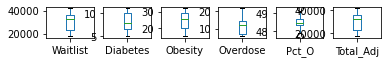

In [69]:
df.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
plt.show()

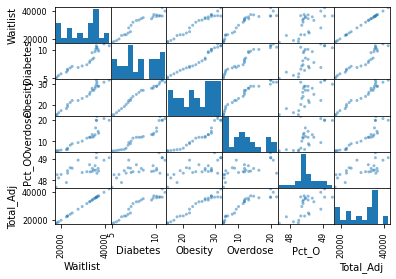

In [70]:
# scatter plot matrix
pd.plotting.scatter_matrix(df)
plt.show()

In [71]:
#Describe data
df.describe()

,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,30262.230769,8.148462,24.461538,11.957692,48.505954,30019.498303
std,7361.928097,1.946545,5.500769,5.210541,0.351944,7362.153768
min,17589.000000,4.980000,15.000000,5.500000,47.683211,17393.760000
25%,23206.750000,6.677500,20.250000,7.150000,48.339451,22979.690000
50%,33163.000000,7.950000,25.500000,11.900000,48.456926,32846.970000
75%,36074.750000,10.042500,29.000000,14.475000,48.654193,35878.807500
max,42085.000000,11.090000,32.000000,21.700000,49.282640,41885.060000


In [72]:
#Correlation Matrix
corr_matrix = df[["Diabetes", "Obesity", "Overdose", "Pct_O"]].corr()
print(corr_matrix)

          Diabetes   Obesity  Overdose     Pct_O
Diabetes  1.000000  0.981923  0.954629  0.668883
Obesity   0.981923  1.000000  0.943421  0.683520
Overdose  0.954629  0.943421  1.000000  0.675088
Pct_O     0.668883  0.683520  0.675088  1.000000


In [73]:
#Assign variables for regression
X = df[['Diabetes','Obesity','Overdose','Pct_O']]
y = df['Total_Adj'].values.reshape(-1,1)
print(X.shape, y.shape)

(26, 4) (26, 1)


In [74]:
#Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [75]:
#Create model
model = LinearRegression()

In [76]:
#fit the model to the training data and calculate the scores for the training and testing data
#Begin
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
#End
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.9698951084432607
Testing Score: 0.9448042989435885


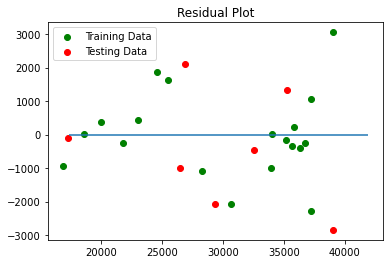

In [77]:
#Plot Residuals for Training and Testing Data
#Begin
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="green", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.savefig('images/National_Residual2020_Plot.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)
#End

In [78]:
#R2 of original model
r_sq = model.score(X, y)
print('coefficient of determination', r_sq)

coefficient of determination 0.9632290268431571


In [79]:
print(model.intercept_)

[27212.72167401]


In [80]:
print(model.coef_)

[[  -8.44866853 1634.27762484 -351.57524929 -680.60048992]]


In [81]:
#Make a Prediction using model
predictedTotal_Adj = model.predict([[10.77,32,19.9,49]])
print(predictedTotal_Adj)

[[39072.84204197]]


In [82]:
print(X_train.shape)

(19, 4)


In [83]:
print(y_train.shape)

(19, 1)


In [84]:
print(y_test.shape)

(7, 1)


In [85]:
print(X_test.shape)

(7, 4)


In [86]:
modeldetail = sm.OLS(y, X)
resultstest = modeldetail.fit()

In [87]:
print(X.shape)

(26, 4)


In [88]:
print(y.shape)

(26, 1)


TypeError: bad operand type for unary +: 'NoneType'

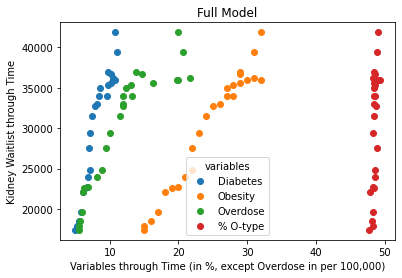

In [89]:
plt.scatter(X[('Diabetes')], y, label='Diabetes')
plt.scatter(X[('Obesity')], y, label='Obesity')
plt.scatter(X[('Overdose')], y, label='Overdose')
plt.scatter(X[('Pct_O')], y, label='% O-type')
plt.title('Full Model')
plt.xlabel('Variables through Time (in %, except Overdose in per 100,000)')
plt.ylabel('Kidney Waitlist through Time')
plt.legend(title='variables',loc='lower center')
+plt.savefig('images/WestVirginia.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)
plt.show()

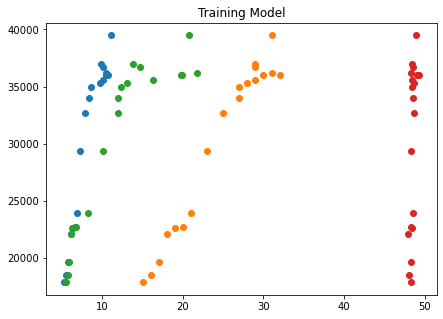

In [90]:
fig = plt.figure()
plt.scatter(X_train[('Diabetes')], y_train)
plt.scatter(X_train[('Obesity')], y_train)
plt.scatter(X_train[('Overdose')], y_train)
plt.scatter(X_train[('Pct_O')], y_train)
plt.title('Training Model')
fig.set_size_inches(7,5)
plt.show()

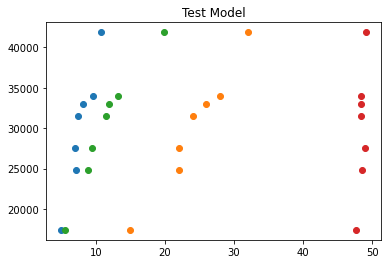

In [91]:
plt.scatter(X_test[('Diabetes')], y_test)
plt.scatter(X_test[('Obesity')], y_test)
plt.scatter(X_test[('Overdose')], y_test)
plt.scatter(X_test[('Pct_O')], y_test)
plt.title('Test Model')
plt.show()

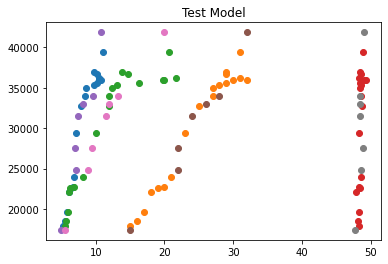

In [92]:
plt.scatter(X_train[('Diabetes')], y_train)
plt.scatter(X_train[('Obesity')], y_train)
plt.scatter(X_train[('Overdose')], y_train)
plt.scatter(X_train[('Pct_O')], y_train)
plt.scatter(X_test[('Diabetes')], y_test)
plt.scatter(X_test[('Obesity')], y_test)
plt.scatter(X_test[('Overdose')], y_test)
plt.scatter(X_test[('Pct_O')], y_test)
plt.title('Test Model')
plt.show()

In [93]:
model_lin = sm.OLS.from_formula("Total_Adj ~ Diabetes + Obesity + Overdose + Pct_O", data=df)
result_lin = model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Total_Adj   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     148.8
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           4.36e-15
Time:                        17:20:15   Log-Likelihood:                -223.96
No. Observations:                  26   AIC:                             457.9
Df Residuals:                      21   BIC:                             464.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.192e+04   5.57e+04      0.214      0.833   -1.04e+05    1.28e+05
Diabetes    -850.2340    904.693     -0.940      0.358   -2731.646    1031.178
Obesity     1786.7074    291.064      6.139      0.000    1181.408    2392.007
Overdose    -184.4884    194.416     -0.949      0.353    -588.798     219.821
Pct_O       -339.5100   1167.685     -0.291      0.774   -2767.843    2088.823
==============================================================================
Omnibus:                        3.962   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                2.484
Skew:                          -0.727   Prob(JB):                        0.289
Kurtosis:                       3.426   Cond. No.                     1.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
ols_df = result_lin.summary()
with open('images/National2020_OLS.txt', 'w') as fh:
    fh.write(ols_df.as_text())

In [95]:
df


,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj,State
0,12/31/1995,17589,4.98,15,5.5,47.683211,17393.76000,United States
1,12/31/1996,18067,5.23,15,5.5,48.259257,17850.20000,United States
2,12/31/1997,18780,5.52,16,5.7,48.109691,18543.37000,United States
3,12/31/1998,19892,5.80,17,5.9,48.270662,19639.37000,United States
4,12/31/1999,22356,6.09,18,6.1,47.897656,22081.02000,United States
5,12/31/2000,22879,6.41,19,6.2,48.446173,22618.18000,United States
6,12/31/2001,22902,6.62,20,6.8,48.332023,22674.20000,United States
7,12/31/2002,24121,6.85,21,8.2,48.584221,23896.16000,United States
8,12/31/2003,25034,7.12,22,8.9,48.561956,24817.91000,United States
9,12/31/2004,27745,6.92,22,9.4,48.934943,27487.03000,United States


In [96]:
sns.regplot(X[('Diabetes')],y)
plt.title('Diabetes % vs. Waitlist')
plt.xlabel('Diabetes %')
plt.ylabel('Kidney Waitlist through Time')
#plt.savefig('images/United States_diabetes.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

IndentationError: unexpected indent (<ipython-input-96-493aa5db8a32>, line 6)

In [97]:
sns.regplot(X[('Obesity')],y)
plt.title('Obesity % vs. Waitlist')
plt.xlabel('Obesity %')
plt.ylabel('Kidney Waitlist through Time')
#plt.savefig('images/United States_obesity.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

IndentationError: unexpected indent (<ipython-input-97-df82b370e7da>, line 6)

In [98]:
sns.regplot(X[('Overdose')],y)
plt.xlabel('Overdose rate per 100k')
plt.title('Overdoses rate per 100k vs. Waitlist')
plt.ylabel('Kidney Waitlist through Time')
#plt.savefig('images/WestVirginia_overdose.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

IndentationError: unexpected indent (<ipython-input-98-26d8ed5f413c>, line 6)

In [99]:
sns.regplot(X[('Pct_O')],y)
plt.xlabel('Percent O Blood-Type')
plt.title('Percent O Blood-Type vs. Waitlist')
plt.ylabel('Kidney Waitlist through Time')
#plt.savefig('images/United States_pct_O.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

IndentationError: unexpected indent (<ipython-input-99-5d5ee31ce4e8>, line 6)

<AxesSubplot:xlabel='Pct_O'>

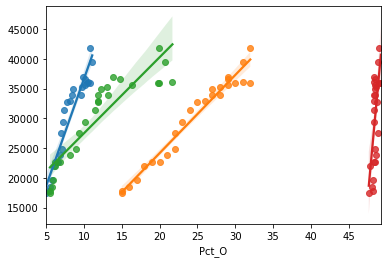

In [100]:
sns.regplot(X[('Diabetes')],y)
sns.regplot(X[('Obesity')],y)
sns.regplot(X[('Overdose')],y)
sns.regplot(X[('Pct_O')],y)

In [101]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
coefficients_transposed = coefficients.T
coefficients_transposed
coefficients_final = coefficients_transposed[1:]
coefficients_final

,0,1,2,3
0,-8.44867,1634.28,-351.575,-680.6


In [11]:
test_df = pd.DataFrame([[r_sq,training_score,testing_score,model.intercept_ ,predictedTotal_Adj]])
test_df

NameError: name 'r_sq' is not defined

In [12]:
#dfi.export(test_df, 'test_df.png')

In [13]:
summary_df = pd.concat([test_df, lastyear_df, coefficients_final], axis=1)
summary_df.columns = ['R2','Training Score', 'Test Score', 'Intercept','Forecast based on Natl Avg','Last Waitlist','Coef_Diabetes','Coef_Obesity','Coef_Overdose','Coef_Pct_O']

NameError: name 'test_df' is not defined

In [130]:
summary_df

,R2,Training Score,Test Score,Intercept,Forecast based on Natl Avg,Last Waitlist,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O
0,0.975181,0.981664,0.953889,[-27088.369451660565],[[40026.95890383248]],41885.06,-849.66,1880.21,-290.466,446.527


In [131]:
summary_df.dtypes

R2                            float64
Training Score                float64
Test Score                    float64
Intercept                      object
Forecast based on Natl Avg     object
Last Waitlist                 float64
Coef_Diabetes                  object
Coef_Obesity                   object
Coef_Overdose                  object
Coef_Pct_O                     object
dtype: object

In [132]:
summary_df

,R2,Training Score,Test Score,Intercept,Forecast based on Natl Avg,Last Waitlist,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O
0,0.975181,0.981664,0.953889,[-27088.369451660565],[[40026.95890383248]],41885.06,-849.66,1880.21,-290.466,446.527


In [133]:
summary_df['Intercept'] = summary_df['Intercept'].astype(int)
summary_df['Forecast based on Natl Avg'] = summary_df['Forecast based on Natl Avg'].astype(int)
summary_df['R2'] = summary_df['R2'].round(decimals=4)
summary_df['Training Score'] = summary_df['Training Score'].round(decimals=4)
summary_df['Test Score'] = summary_df['Test Score'].round(decimals=4)
summary_df = summary_df[['R2','Training Score','Test Score','Intercept','Coef_Diabetes','Coef_Obesity','Coef_Overdose','Coef_Pct_O','Last Waitlist','Forecast based on Natl Avg']]
#dfi.export(summary_df, 'images/United States_summary.png')

In [134]:
summary_df

,R2,Training Score,Test Score,Intercept,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O,Last Waitlist,Forecast based on Natl Avg
0,0.9752,0.9817,0.9539,-27088,-849.66,1880.21,-290.466,446.527,41885.06,40026


In [135]:
summaryalt_df = summary_df.style.set_properties(**{'background-color': 'black','color': 'lawngreen','border-color': 'white'})
summaryalt_df

,R2,Training Score,Test Score,Intercept,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O,Last Waitlist,Forecast based on Natl Avg
0,0.975200,0.981700,0.953900,-27088,-849.660294,1880.207442,-290.466278,446.526745,41885.060000,40026
